In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X.shape

(500, 2)

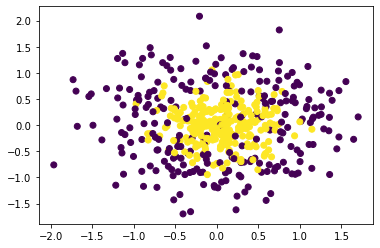

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

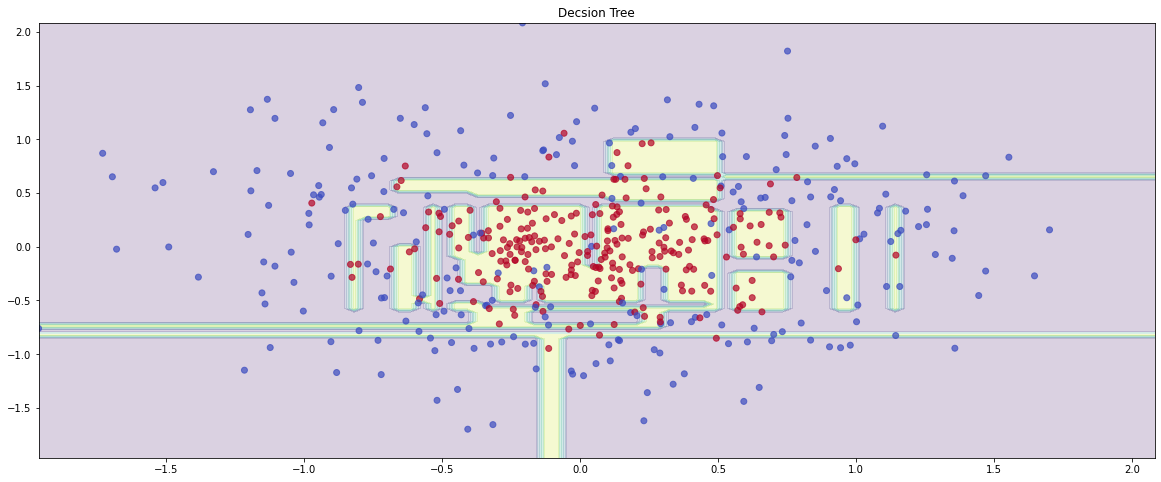

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

plt.figure(figsize=(20,8))
X_range = np.linspace(X.min(),X.max(),100)
XX,yy = np.meshgrid(X_range,X_range)

y_hat = dt.predict(np.c_[XX.ravel(),yy.ravel()])
y_hat = y_hat.reshape(XX.shape)
plt.contourf(XX,yy,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=.7)
plt.title('Decsion Tree')
plt.show()

<AxesSubplot:>

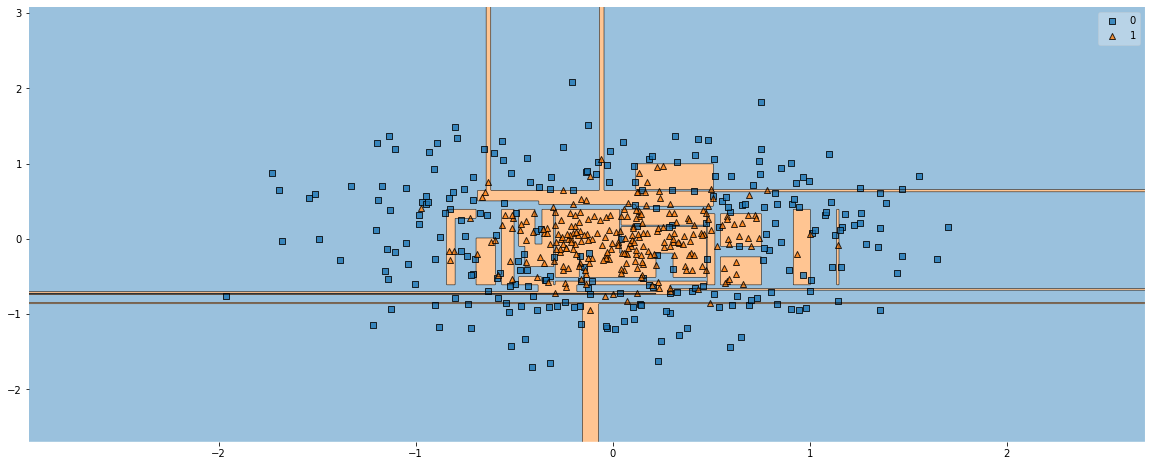

In [10]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(20,8))
plot_decision_regions(X,y,dt)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

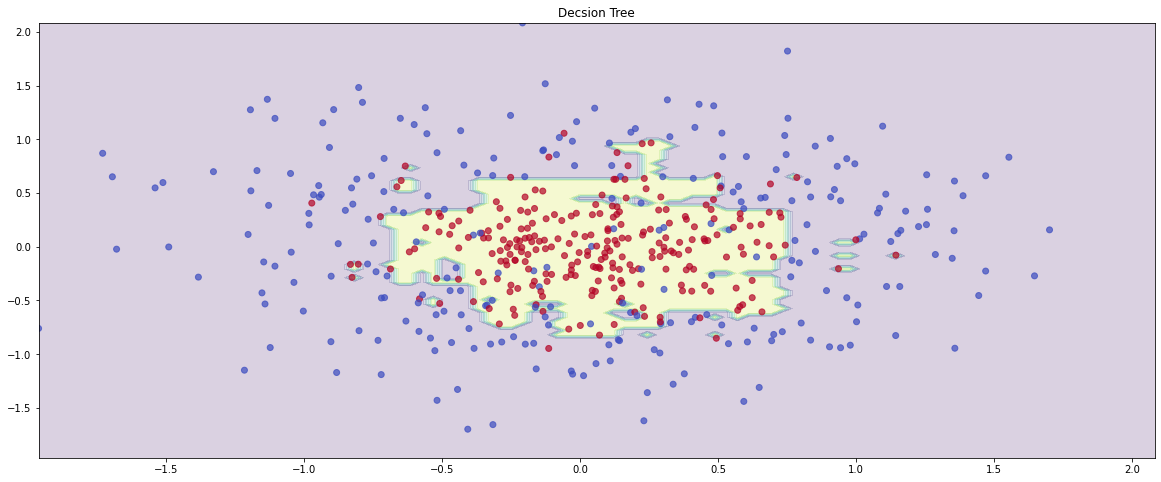

In [15]:
plt.figure(figsize=(20,8))
X_range = np.linspace(X.min(),X.max(),100)
XX,yy = np.meshgrid(X_range,X_range)

y_hat = rf.predict(np.c_[XX.ravel(),yy.ravel()])
y_hat = y_hat.reshape(XX.shape)
plt.contourf(XX,yy,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=.7)
plt.title('Decsion Tree')
plt.show()

<AxesSubplot:>

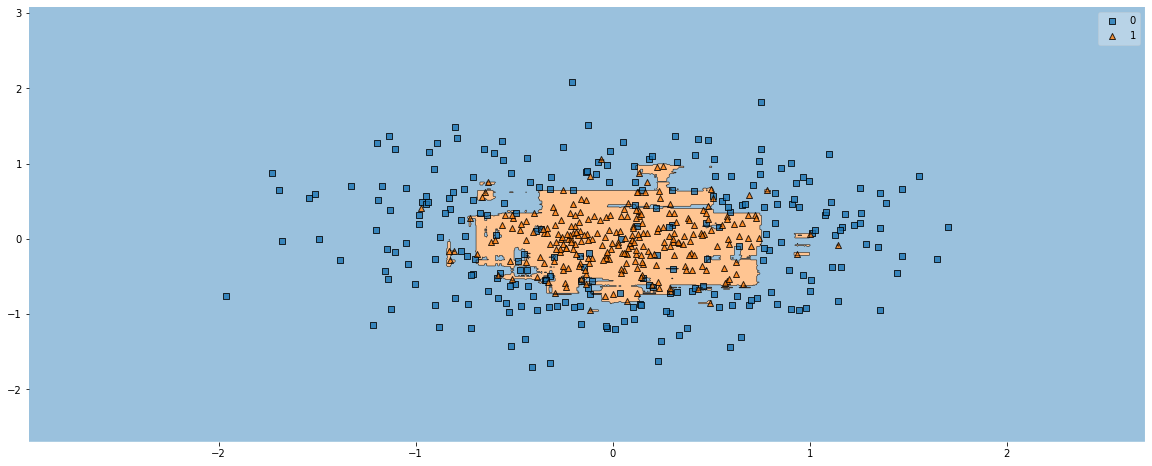

In [16]:
plt.figure(figsize=(20,8))
plot_decision_regions(X,y,rf)

# regression Comparision

In [18]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

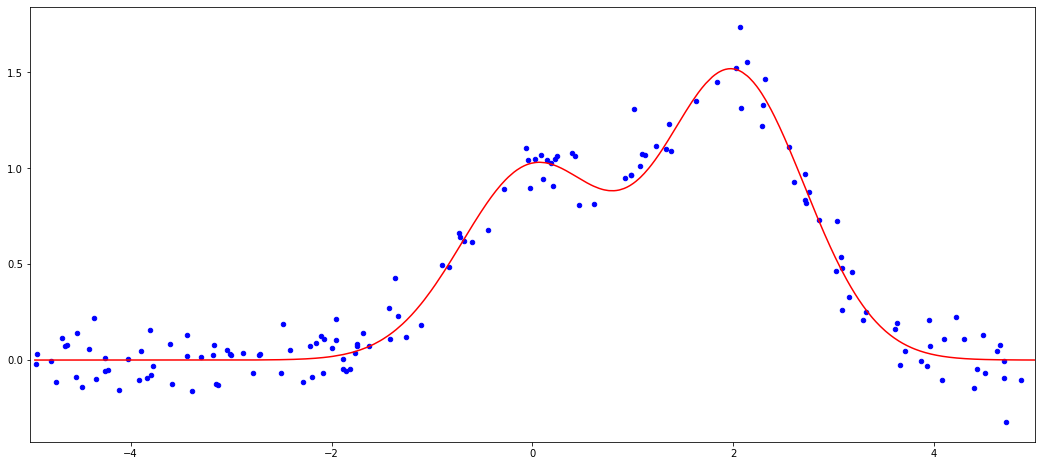

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])


Text(0.5, 1.0, 'Decision tree, MSE = 19.34')

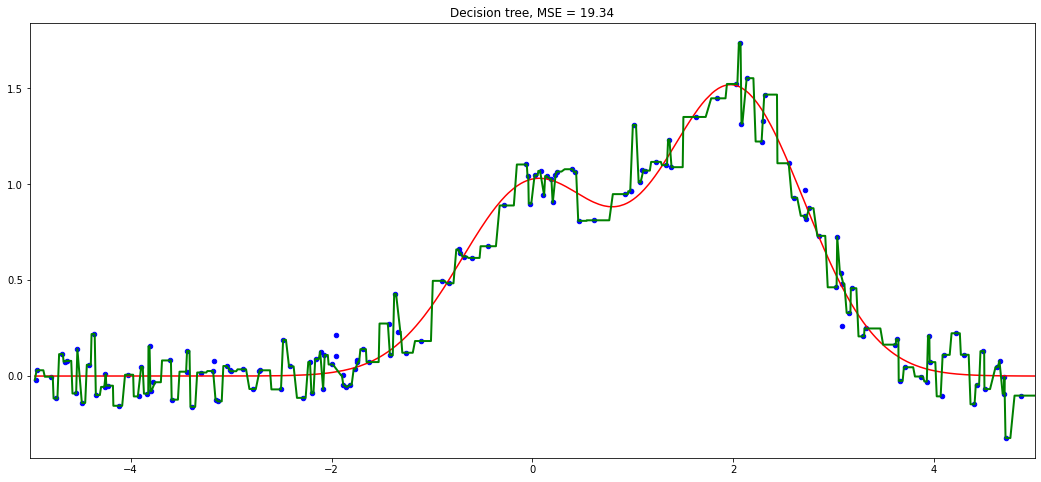

In [20]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

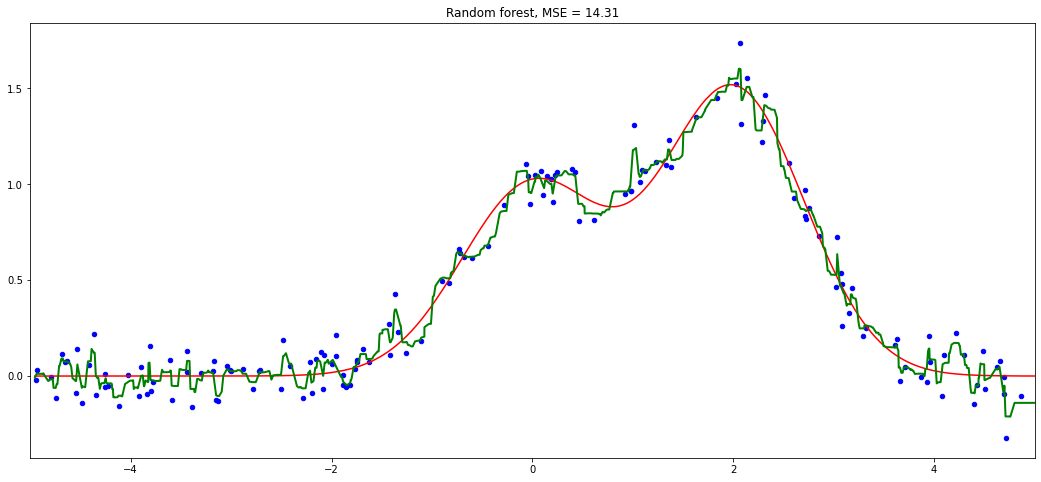

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));